# Control por variación de frecuencia del Motor Asincrónico

## Característica mecánica
Recordamos la ecuación de la característica mecánica del Motor Asincrónico

$$M={{3U_f^2r_2'} \over {\omega_s[(r_1+{r_2' \over s})^2+(x_1+x_2')^2}]s}$$

Veamos los datos de chapa para un motor ejemplo: MT-42-8.

In [9]:
Un = 380/3**0.5 # V de fase
Pn = 16    # Kw
Nn = 955   # rpm
la = 2.8   # Mc/Mn
pf = 0.77  # Factor de potencia
I1n = 37.6 # A
R1 = 0.33
X1 = 0.41
R2 = 0.099
X2 = 0.25
ke = 1.75  # R2' = ke^2 * R2
fn = 50    # Hz frecuencia de la red
p = 3      # pares de polos

In [3]:
import numpy as np

$\omega_0=1000$rpm porque la frecuencia de la red es 50Hz y calculamos su valor en rad/s:

In [4]:
w0 = 1000*np.pi/30
print(F"w0={w0:.0f}rad/s")

w0=105rad/s


Calculamos $r_2'=k_e^2r_2$ y  $x_2'=k_e^2x_2$

In [5]:
R2r = ke**2*R2
X2r = ke**2*X2
print(F"R2r={R2r:.2f}ohm")
print(F"X2r={X2r:.2f}ohm")

R2r=0.30ohm
X2r=0.77ohm


In [6]:
Mc = 3*Un**2/(2*w0*(R1+(R1**2+(X1+X2r)**2)**0.5))
Sc = R2r/(R1**2+(X1+X2r)**2)**0.5
print(F"Mc={Mc:.0f}Nm")
print(F"Sc={Sc:.2f}")

Mc=445Nm
Sc=0.25


## Variador de frecuencia
![circuito](img/variadores-frecuencia.png)

Debemos variar no solo la frecuencia sino también la amplitud de la tensión aplicada. Es deseable mantener constante los siguientes parámetros:
 - Eficiencia 
 - Factor de potencia
 - Capacidad de sobrecarga
 - Deslizamiento 
 
Para esto debe cumplirse lo que conocemos como **Ley de Kostenko**:

$${U_f' \over U_f}={f' \over f}{\sqrt{M'} \over \sqrt{M}}$$


### Carga de momento constante

Si evaluamos la **Ley de Kostenko** para cada tipo de carga, obtendremos la ley de mando óptima y las características mecánicas correspondientes.

Para el caso de la **carga de momento constante** tenemos que $M'=M$ y evaluando en la igualdad anterior:

$${U_f' \over U_f}={f' \over f}$$

Para trazar las características mecánicas vamos a seleccionar 3 valores distintos de la fecuencia:

In [ ]:
f1 = 40 # Hz
f2 = 30 # Hz
f3 = 20 # Hz

Aplicamos la ley de madno para calcular la amplitud de la tensión 
y calculamos los valores de la velocidad sincrónica, las reactancias
y el momento crítico para cada frecuencia.

In [40]:
U1 = Un*f1/fn
U2 = Un*f2/fn
U3 = Un*f3/fn

w01 = f1*w0/fn
w02 = f2*w0/fn
w03 = f3*w0/fn

X1f1 = f1*X1/fn
X1f2 = f2*X1/fn
X1f3 = f3*X1/fn

X2rf1 = f1*X2r/fn
X2rf2 = f2*X2r/fn
X2rf3 = f3*X2r/fn

Mc = 3*Un**2/(2*w0*(R1+(R1**2+(X1+X2r)**2)**0.5))
Mc1 = 3*U1**2/(2*w01*(R1+(R1**2+(X1f1+X2rf1)**2)**0.5))
Mc2 = 3*U2**2/(2*w02*(R1+(R1**2+(X1f2+X2rf2)**2)**0.5))
Mc3 = 3*U3**2/(2*w03*(R1+(R1**2+(X1f3+X2rf3)**2)**0.5))


Mostremos los resultados

In [42]:
import tabulate
data = [
    [fn,F"{w0:.0f}",F"{Un:.0f}",F"{X1:.02f}",F"{X2r:.02f}",F"{Mc:.0f}"],
    [f1,F"{w01:.0f}",F"{U1:.0f}",F"{X1f1:.02f}",F"{X2rf1:.02f}",F"{Mc1:.0f}"],
    [f2,F"{w02:.0f}",F"{U2:.0f}",F"{X1f2:.02f}",F"{X2rf2:.02f}",F"{Mc2:.0f}"],
    [f3,F"{w03:.0f}",F"{U3:.0f}",F"{X1f3:.02f}",F"{X2rf3:.02f}",F"{Mc3:.0f}"],
]
table = tabulate.tabulate(data, 
                          headers=["f (Hz)", "w0 (rad/s)", "Uf (V)", "X1 (ohm)", "X2r (ohm)", "Mc (Nm)"],
                          tablefmt='html')
table

f (Hz),w0 (rad/s),Uf (V),X1 (ohm),X2r (ohm),Mc (Nm)
50,105,219,0.41,0.77,445
40,84,176,0.33,0.61,416
30,63,132,0.25,0.46,373
20,42,88,0.16,0.31,305


Evaluamos un vector de momentos para los 4 valores de frecuencia.

In [36]:
s = np.linspace(-0.05, 1.2, 100)
M = (3*Un**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))
Mf1 = (3*U1**2*R2r)/(w01*s*((R1+R2r/s)**2+(X1f1+X2rf1)**2))
Mf2 = (3*U2**2*R2r)/(w02*s*((R1+R2r/s)**2+(X1f2+X2rf2)**2))
Mf3 = (3*U3**2*R2r)/(w03*s*((R1+R2r/s)**2+(X1f3+X2rf3)**2))
w = (1-s)*w0
w1 = (1-s)*w01
w2 = (1-s)*w02
w3 = (1-s)*w03

Ahora trazamos las 4 curvas

Text(0, 0.5, '$\\omega$ (rad/s)')

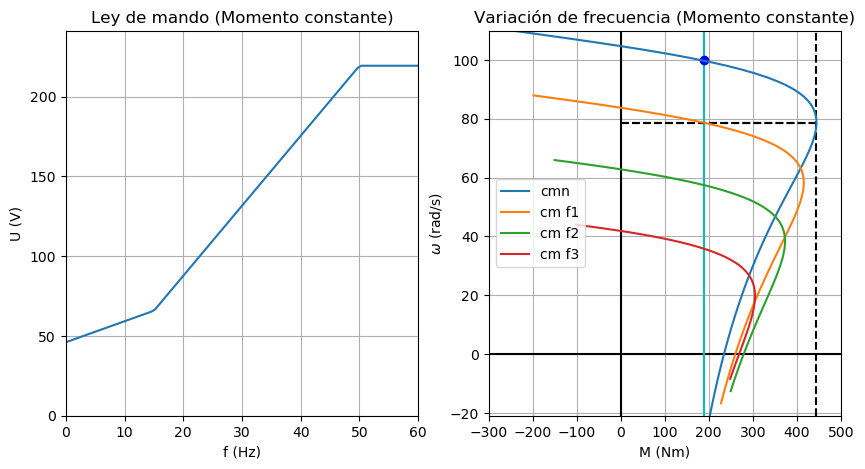

In [65]:
import matplotlib.pyplot as pyl

# Crear una figura rectangular
pyl.figure(figsize=(10,5))

# Ley de mando
pyl.subplot(1, 2, 1)

kboost = 0.3
fboost = kboost*fn
Uboost = kboost*Un
Ustart = 0.7*Uboost

k = Un/fn # pendiente

f = np.linspace(0, 1.2*fn, 100)
U = k*f

U[f > fn] = Un
U[f < fboost] = Ustart + (Uboost - Ustart)/fboost*f[f < fboost] 

pyl.plot(f, U)

# Detalles del gráfico
pyl.title("Ley de mando (Momento constante)")
pyl.ylim(((0, 1.1*Un)))
pyl.xlim((0, max(f)))
pyl.grid()
pyl.xlabel("f (Hz)")
pyl.ylabel("U (V)")


# Característica mecánica
pyl.subplot(1, 2, 2)
# Ejes
y = np.linspace(min(w),max(w),100)
x = np.linspace(-300,500,100)
ceros = np.zeros(100)
pyl.plot(ceros, y, 'k', x, ceros, 'k')

# Momento y deslizamiento crítico
wc = w0*(1-Sc)
xc = np.linspace(0, Mc, 100)
pyl.plot(Mc*np.ones(100), y, 'k--', xc, wc*np.ones(100), 'k--')

# Punto de operación nominal
wn = Nn*np.pi/30
Sn = (w0-wn)/wn
Mn = (3*Un**2*R2r)/(w0*Sn*((R1+R2r/Sn)**2+(X1+X2r)**2))
pyl.plot(Mn*np.ones(100), y, 'c', xc, wc*np.ones(100), 'k--')
pyl.plot(Mn, wn, 'bo')

# Características mecánicas
pyl.plot(M, w, label="cmn")
pyl.plot(Mf1, w1, label="cm f1")
pyl.plot(Mf2, w2, label="cm f2")
pyl.plot(Mf3, w3, label="cm f3")

# Detalles del gráfico
pyl.title("Variación de frecuencia (Momento constante)")
pyl.ylim(((min(w),max(w))))
pyl.xlim((-300, 500))
pyl.grid()
pyl.legend()
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** limitado por la disminución de la rigidez. Dmáx= 2:1 ; 3:1.

**Gradualidad** a saltos por la gran corriente de armadura que no permite usar reóstato.

**Estabilidad** empeora con el aumento del $s_c={r_2' \over {\sqrt{r_1^2+(x_1+x_2')^2}}}$.

**Factibilidad Económica** Inversión inicial baja y circuito simple. Pero la eficiencia energética es mala pues se disipa gran potencia en las resistencias (hasta el 50% de la energía consumida).

**Carga permisible** Carga tipo ventilador y en algunos casos dentro de un rango limitado, carga de momento constante.

**Dirección del control** Por debajo de las velocidades básicas.

## Control por pulsos en el rotor
![circuito](img/Motor_CA_pulsos_rotor.jpg)

Esta vez se definen las resistencias del circuito como $R_{ad}$ y $R_{ext}$. Los extremos se optienen para cuando no hay conducción del tiristor ($R_{ad}+R_{ext}$) y cuando conduce todo el tiempo ($R_{ad}$).

In [9]:
Rad = 0.1 # ohm
Rext = 5 # ohm
print(F"Rad={Rad:.2f}ohm")
print(F"Rext={Rext:.2f}ohm")

Mrad = (3*Un**2*(R2r+Rad))/(w0*s*((R1+(R2r+Rad)/s)**2+(X1+X2r)**2))
Mrext = (3*Un**2*(R2r+Rad+Rext))/(w0*s*((R1+(R2r+Rad+Rext)/s)**2+(X1+X2r)**2))

Rad=0.10ohm
Rext=5.00ohm


Ahora trazamos las 3 curvas

Text(0, 0.5, '$\\omega$ (rad/s)')

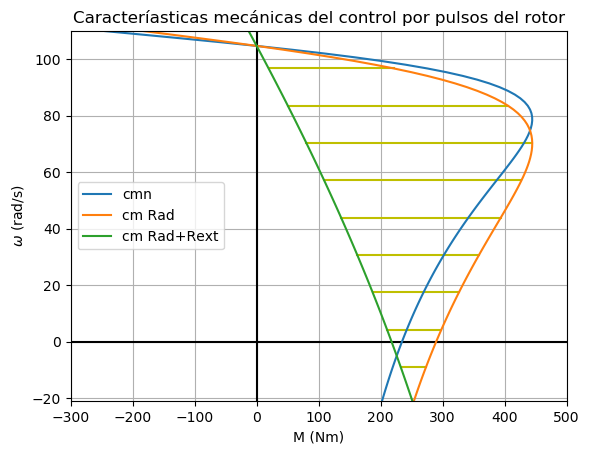

In [14]:
# Ejes
y = np.linspace(min(w),max(w),100)
x = np.linspace(-300,500,100)
ceros = np.zeros(100)
pyl.plot(ceros, y, 'k', x, ceros, 'k')

# Zona de control
for i in range(10,100,10):
    x = np.linspace(Mrext[i], Mrad[i], 100)
    pyl.plot(x, w[i]*np.ones(100), 'y')

# Características mecánicas
pyl.plot(M, w, label="cmn")
pyl.plot(Mrad, w, label="cm Rad")
pyl.plot(Mrext, w, label="cm Rad+Rext")

# Detalles del gráfico
pyl.title("Caracteríasticas mecánicas del control por pulsos del rotor")
pyl.ylim(((min(w),max(w))))
pyl.xlim((-300, 500))
pyl.grid()
pyl.legend()
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** limitado por el número de resistencias. Dmáx= 2:1 ; 3:1.

**Gradualidad** suave pues se utiliza un reóstato para variar el ángulo de disparo del tiristor. Éste es el único indicador que cambia con respecto al control por resistencias en el rotor.

**Estabilidad** empeora con el aumento del $s_c{r_2' \over {\sqrt{r_1^2+(x_1+x_2')^2}}}$.

**Factibilidad Económica** Inversión inicial baja y circuito simple. Pero la eficiencia energética es mala pues se disipa gran potencia en las resistencias (hasta el 50% de la energía consumida).

**Carga permisible** Carga tipo ventilador y en algunos casos dentro de un rango limitado, carga de momento constante.

**Dirección del control** Por debajo de las velocidades básicas.

## Control por pulsos en el estator (variación de tensión)
![circuito](img/voltaje.png)

Vamos a tomar 3 valores distintos de tensión

In [18]:
U1 = 0.9*Un
U2 = 0.75*Un
U3 = 0.6*Un

M_U1 = (3*U1**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))
M_U2 = (3*U2**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))
M_U3 = (3*U3**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))

Text(0, 0.5, '$\\omega$ (rad/s)')

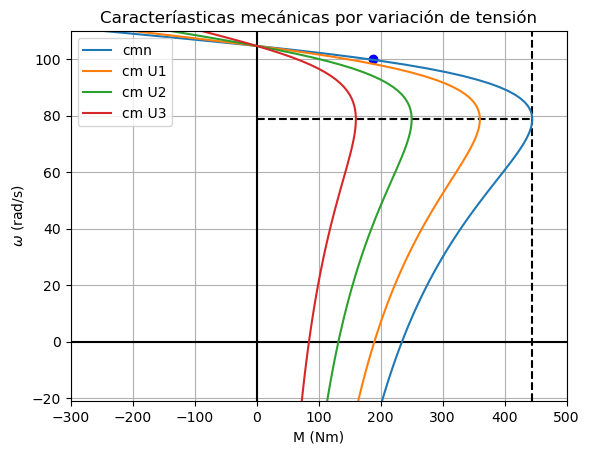

In [19]:
# Ejes
y = np.linspace(min(w),max(w),100)
x = np.linspace(-300,500,100)
ceros = np.zeros(100)
pyl.plot(ceros, y, 'k', x, ceros, 'k')

# Momento y deslizamiento crítico
wc = w0*(1-Sc)
xc = np.linspace(0, Mc, 100)
pyl.plot(Mc*np.ones(100), y, 'k--', xc, wc*np.ones(100), 'k--')

# Punto de operación nominal
wn = Nn*np.pi/30
Sn = (w0-wn)/wn
Mn = (3*Un**2*R2r)/(w0*Sn*((R1+R2r/Sn)**2+(X1+X2r)**2))
pyl.plot(Mn, wn, 'bo')

# Características mecánicas
pyl.plot(M, w, label="cmn")
pyl.plot(M_U1, w, label="cm U1")
pyl.plot(M_U2, w, label="cm U2")
pyl.plot(M_U3, w, label="cm U3")

# Detalles del gráfico
pyl.title("Caracteríasticas mecánicas por variación de tensión")
pyl.ylim(((min(w),max(w))))
pyl.xlim((-300, 500))
pyl.grid()
pyl.legend()
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** Muy limitado porque no varía el deslizamiento crítico.

**Gradualidad** es suave pues depende del ángulo de disparo.

**Estabilidad** empeora pues la rigidez disminuye con la disminución del momento crítico al mantenerse constante el deslizamiento crítico.

**Factibilidad Económica** Inversión inicial relativamente baja. La eficiencia energética es aceptable.

**Carga permisible** Carga tipo ventilador.

**Dirección del control** Por debajo de las velocidades básicas.